# Pre trained network
![imagen](https://www.researchgate.net/publication/336874848/figure/fig1/AS:819325225144320@1572353764073/Illustrations-of-transfer-learning-a-neural-network-is-pretrained-on-ImageNet-and.png)

Estas son las arquitecturas de redes neuronales más utilizadas en la comunidad. Para más detalle sobre el funcionamiento de cada red, consultar el [Hands on Machine Learning for Python](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch14.html#cnn_chapter).
* VGG-16
* VGG-19
* Inception V3
* XCeption
* ResNet-50

Las redes se pueden incorporar entrenadas, o sin entrenar.

## ResNet50V2

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

from keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
base_model = ResNet50V2(input_shape=(224,224,3), include_top=True, weights='imagenet')

In [3]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

Cargamos algunas imagenes desde local, para ver qué tal funciona la red ResNet50V2 ya entrenada.

In [6]:
import os


def read_data(path):
    X = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224, 224))
        print(path + '/' + file)
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data('img')

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

img/75f60558-eba7-4157-9d69-052b6c3fa340.jpg
img/bear-1.jpg
img/cat.8016.jpg
img/cat.8037.jpg
img/dog.11856.jpg
img/dog.11857.jpg
img/horse.jpg
img/karate.jpg
img/pizza.jpg
(9, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 pomegranate 0.37832797
Predicted:
 spaghetti_squash 0.08134317
Predicted:
 sandbar 0.059246007
Predicted:
 croquet_ball 0.051288135
Predicted:
 seashore 0.050366383


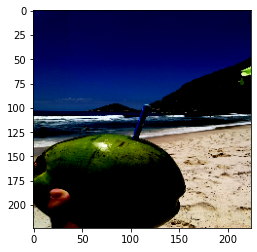

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 brown_bear 0.99944407
Predicted:
 chow 0.0005413934
Predicted:
 American_black_bear 8.7845065e-06
Predicted:
 ice_bear 1.1080901e-06
Predicted:
 howler_monkey 4.405724e-07


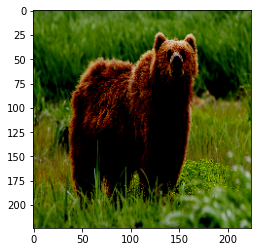

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 Egyptian_cat 0.6597239
Predicted:
 Siamese_cat 0.1574108
Predicted:
 tiger_cat 0.06259996
Predicted:
 lynx 0.02283666
Predicted:
 tabby 0.018356169


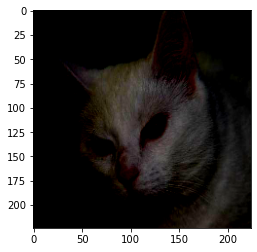

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 Egyptian_cat 0.82118666
Predicted:
 lynx 0.1293214
Predicted:
 Siamese_cat 0.021827295
Predicted:
 tabby 0.018324591
Predicted:
 tiger_cat 0.0067972755


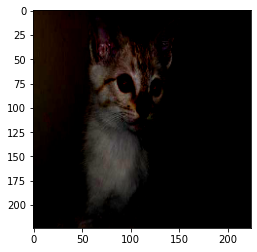

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 Rottweiler 0.7618963
Predicted:
 Brabancon_griffon 0.07461349
Predicted:
 Staffordshire_bullterrier 0.02857268
Predicted:
 EntleBucher 0.01990434
Predicted:
 Doberman 0.01928516


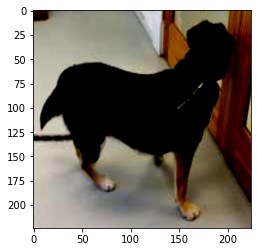

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 collie 0.99525565
Predicted:
 Shetland_sheepdog 0.004744281
Predicted:
 yellow_lady's_slipper 9.751216e-09
Predicted:
 goldfinch 8.175372e-09
Predicted:
 groenendael 7.475519e-09


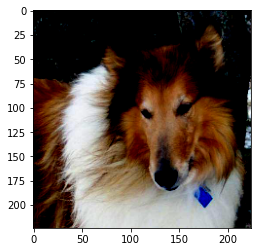

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 standard_poodle 0.32618642
Predicted:
 Saluki 0.2963581
Predicted:
 ram 0.12240872
Predicted:
 bighorn 0.118147254
Predicted:
 Ibizan_hound 0.060498256


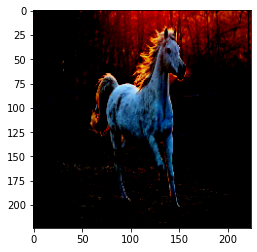

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 ballplayer 0.54023397
Predicted:
 baseball 0.24657924
Predicted:
 balance_beam 0.11725259
Predicted:
 torch 0.018077934
Predicted:
 puck 0.009959637


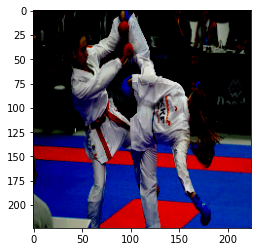

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


##################
Predicted:
 pizza 0.997421
Predicted:
 bagel 0.0011646912
Predicted:
 potpie 0.00081819756
Predicted:
 carbonara 9.463586e-05
Predicted:
 French_loaf 8.596289e-05


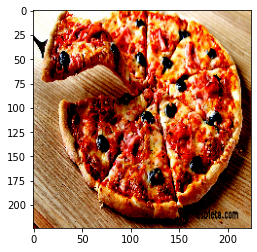

In [7]:
preds = base_model.predict(x_test)

decodes = decode_predictions(preds, top=5)

k=0
for j in decodes:

    print('##################')

    plt.imshow(x_test[k]);
    k += 1
    for i, decode in enumerate(j):
        print('Predicted:\n', decode[1], decode[2])
        
    plt.pause(0.1)

## VGG16
En este caso vamos a importar la red VGG16, que utilizaremos como red preentrenada y completaremos con una fully connected layer. 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

IM_SIZE=32

TRAIN_PATH = "train\\"
filenames = os.listdir(TRAIN_PATH)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
    
df = pd.DataFrame({
    'filenames': filenames,
    'category': categories
})

train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [9]:
train_df.head()

,filenames,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat


In [10]:
from keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [11]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df.sample(5000),
                                                    TRAIN_PATH,
                                                    x_col='filenames',
                                                    y_col='category',
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (IM_SIZE, IM_SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df.sample(1000),
                                                              TRAIN_PATH,
                                                              x_col='filenames',
                                                              y_col='category',
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (IM_SIZE, IM_SIZE))

Found 5000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(IM_SIZE, IM_SIZE,3),
                  include_top=False,weights='imagenet')

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# FULLY CONNECTED LAYER
x = layers.Flatten()(base_model.output) # Añado una flatten a la salida del base_model, al cual le quité el top layer

x2 = layers.Dense(512,activation='relu')(x) # Añado una capa densa a x (Flatten)

x3 = layers.Dropout(0.5)(x2)

x4 = layers.Dense(1, activation='sigmoid')(x3)

model = tf.keras.models.Model(base_model.input,x4)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [16]:
vgghist = model.fit(train_generator,
                   validation_data = validation_generator,
                   epochs=10)

Epoch 1/10
250/250 [==============================] - 84s 330ms/step - loss: 0.6482 - accuracy: 0.6340 - val_loss: 0.5904 - val_accuracy: 0.6840
Epoch 2/10
250/250 [==============================] - 39s 158ms/step - loss: 0.6164 - accuracy: 0.6534 - val_loss: 0.5695 - val_accuracy: 0.6880
Epoch 3/10
250/250 [==============================] - 41s 162ms/step - loss: 0.6007 - accuracy: 0.6736 - val_loss: 0.5754 - val_accuracy: 0.6700
Epoch 4/10
250/250 [==============================] - 39s 156ms/step - loss: 0.5993 - accuracy: 0.6732 - val_loss: 0.5599 - val_accuracy: 0.7160
Epoch 5/10
250/250 [==============================] - 40s 158ms/step - loss: 0.5981 - accuracy: 0.6714 - val_loss: 0.5626 - val_accuracy: 0.7070
Epoch 6/10
250/250 [==============================] - 42s 168ms/step - loss: 0.5913 - accuracy: 0.6784 - val_loss: 0.5488 - val_accuracy: 0.7120
Epoch 7/10
250/250 [==============================] - 45s 179ms/step - loss: 0.5830 - accuracy: 0.6814 - val_loss: 0.5454 - val_ac

### Inception

In [20]:
train_df

,filenames,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [21]:
IM_SIZE = 150

train_generator = train_datagen.flow_from_dataframe(train_df.sample(5000),
                                                    TRAIN_PATH,
                                                    x_col='filenames',
                                                    y_col='category',
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (IM_SIZE, IM_SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df.sample(1000),
                                                              TRAIN_PATH,
                                                              x_col='filenames',
                                                              y_col='category',
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (IM_SIZE, IM_SIZE))

Found 5000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape=(IM_SIZE,IM_SIZE,3),
                        include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 61s 1us/step


In [23]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [25]:
x = layers.Flatten()(base_model.output)
x2 = layers.Dense(1024, activation='relu')(x)
x3 = layers.Dropout(0.2)(x2)
x4 = layers.Dense(3, activation='sigmoid')(x3)

model = tf.keras.models.Model(base_model.input, x4)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [28]:
inc_history = model.fit(train_generator,
                     validation_data=validation_generator,
                      steps_per_epoch=100,
                      epochs=10
                 )

Epoch 1/10
100/100 [==============================] - 70s 642ms/step - loss: 3.7595 - acc: 0.8640 - val_loss: 0.4846 - val_acc: 0.9410
Epoch 2/10
100/100 [==============================] - 62s 616ms/step - loss: 0.5991 - acc: 0.9005 - val_loss: 0.1571 - val_acc: 0.9490
Epoch 3/10
100/100 [==============================] - 62s 622ms/step - loss: 0.1958 - acc: 0.9150 - val_loss: 0.1113 - val_acc: 0.9560
Epoch 4/10
100/100 [==============================] - 60s 602ms/step - loss: 0.1750 - acc: 0.9260 - val_loss: 0.1236 - val_acc: 0.9550
Epoch 5/10
100/100 [==============================] - 54s 544ms/step - loss: 0.1766 - acc: 0.9210 - val_loss: 0.1095 - val_acc: 0.9570
Epoch 6/10
100/100 [==============================] - 53s 532ms/step - loss: 0.1805 - acc: 0.9250 - val_loss: 0.1061 - val_acc: 0.9550
Epoch 7/10
100/100 [==============================] - 53s 529ms/step - loss: 0.1963 - acc: 0.9185 - val_loss: 0.1089 - val_acc: 0.9560
Epoch 8/10
100/100 [==============================] - 5